In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from plotly.subplots import make_subplots


In [7]:
df1 = pd.read_csv("D:\\data science\\project\\Credit_data\\Credit_Risk_01.xlsx.csv")
df2 = pd.read_csv("D:\\data science\\project\\Credit_data\\Credit_Risk_02.xlsx.csv")
df3 = pd.read_csv("D:\\data science\\project\\Credit_data\\Features_Target_Description.xlsx.csv")

In [8]:
df1.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
33854,33855,7,2,5,2,0,0.286,0.0,0.714,0.286,...,0,5,0,0,1,0,7,1,19,1
45476,45477,14,2,12,1,0,0.071,0.0,0.857,0.143,...,1,6,2,0,1,5,9,1,67,5
7883,7884,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0,0,0,0,1,0,0,7,7
40211,40212,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0,0,0,0,1,0,1,86,86
37832,37833,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0,0,0,0,1,0,1,43,43


In [9]:
df2.sample(5)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
41505,41506,63,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.000,0.0,6.109,1,0,others,others,683,P2
11240,11241,55,35,10,6,83,52,0,1,1,...,1.0,0.333,1.0,0.527,1,0,CC,others,652,P4
19058,19059,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.000,0.0,4.737,0,0,others,others,685,P2
36286,36287,30,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.000,0.0,-99999.000,0,0,ConsumerLoan,others,668,P3
7163,7164,82,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.000,0.0,1.392,0,0,ConsumerLoan,ConsumerLoan,684,P2


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [12]:
print(df1.shape)
print(df2.shape)

(51336, 26)
(51336, 62)


In [13]:
print(df1.isnull().sum()/len(df1)*100)
print(df2.isnull().sum()/len(df2)*100)

PROSPECTID              0.0
Total_TL                0.0
Tot_Closed_TL           0.0
Tot_Active_TL           0.0
Total_TL_opened_L6M     0.0
Tot_TL_closed_L6M       0.0
pct_tl_open_L6M         0.0
pct_tl_closed_L6M       0.0
pct_active_tl           0.0
pct_closed_tl           0.0
Total_TL_opened_L12M    0.0
Tot_TL_closed_L12M      0.0
pct_tl_open_L12M        0.0
pct_tl_closed_L12M      0.0
Tot_Missed_Pmnt         0.0
Auto_TL                 0.0
CC_TL                   0.0
Consumer_TL             0.0
Gold_TL                 0.0
Home_TL                 0.0
PL_TL                   0.0
Secured_TL              0.0
Unsecured_TL            0.0
Other_TL                0.0
Age_Oldest_TL           0.0
Age_Newest_TL           0.0
dtype: float64
PROSPECTID                      0.0
time_since_recent_payment       0.0
time_since_first_deliquency     0.0
time_since_recent_deliquency    0.0
num_times_delinquent            0.0
                               ... 
GL_Flag                         0.0
last_

In [14]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


Important Features

1. CC_TL
2. Age_Oldest_TL
3. Age_Newest_TL
4. Home_TL
5. Tol_Missed_Pmnt
6. Total_TL
7. PL_TL
8. Approved_Flag
9. Credit_Score
10. GL_Glag
11. HL_Flag
12. AGE
13. GENDER
14. EDUCATION
15. MARITALSTATUS
16. NETMONTHLYINCOME
17. max_unsec_exposure_inPct
18. time_since_recent_payment

In [15]:
print(df2["Approved_Flag"].unique())
print(df2["MARITALSTATUS"].unique())
print(df2["EDUCATION"].unique())
print(df2["NETMONTHLYINCOME"].unique())
print(df2["Credit_Score"].unique())
print(df1["Age_Newest_TL"].unique())
print(df1["Age_Oldest_TL"].unique())

['P2' 'P1' 'P3' 'P4']
['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
[51000 19000    18 ... 11685 28470 12802]
[696 685 693 673 753 668 703 676 658 705 682 669 687 692 643 678 691 720
 699 689 702 677 660 740 671 638 663 657 672 662 659 651 679 655 664 654
 690 694 675 670 684 697 688 695 686 618 707 710 698 647 680 666 665 681
 746 652 648 630 635 708 683 646 706 715 704 716 623 700 718 709 639 667
 649 674 721 714 650 701 729 642 754 570 734 712 656 653 722 632 661 624
 644 724 731 645 759 633 730 621 629 719 725 590 723 737 717 613 739 711
 628 713 610 640 727 726 744 636 631 614 765 627 733 615 608 622 612 637
 745 732 741 749 584 641 778 752 599 772 619 758 597 728 587 755 634 539
 541 735 626 738 750 742 781 607 616 598 743 756 776 757 736 748 611 620
 760 784 809 747 600 511 529 769 790 625 605 596 594 617 774 603 785 589
 561 763 585 601 767 569 775 551 586 762 591 764 553 560 536 761 794 777
 593 582 604 488 588 780 566

In [16]:
df1 = df1.loc[df1["Age_Oldest_TL"]!=-99999]

In [17]:
# remove null values columns

columns_to_be_remove=[]

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_remove.append(i)

In [18]:
df2 = df2.drop(columns_to_be_remove, axis=1)

In [19]:
for i in df2.columns:
    df2 = df2.loc[df2[i]!= -9999]

In [20]:
# checking comon column names

for i in list(df1.columns):
    if i in list(df2.columns):
        print(i)

PROSPECTID


In [21]:

# PROSPECTID = coustomerID

In [22]:
# Marge the two dataframes, inner join  so that no null are present

df = pd.merge(df1, df2, how = "inner", on=["PROSPECTID"])

C:\Users\Sande\AppData\Local\Temp\ipykernel_20252\3249981500.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AGE"])


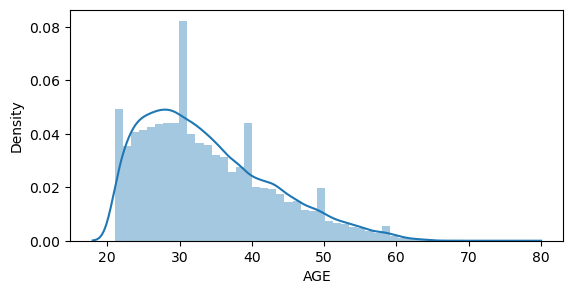

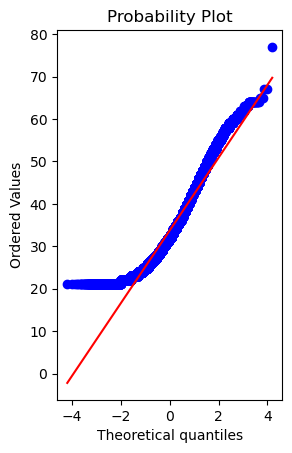

In [23]:
# Age distplot
plt.figure(figsize=(14,3))
plt.subplot(121)
sns.distplot(df["AGE"])
plt.show()


plt.subplot(121)
stats.probplot(df["AGE"], dist="norm", plot=plt)
plt.show()

C:\Users\Sande\AppData\Local\Temp\ipykernel_20252\1144454743.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Credit_Score"])


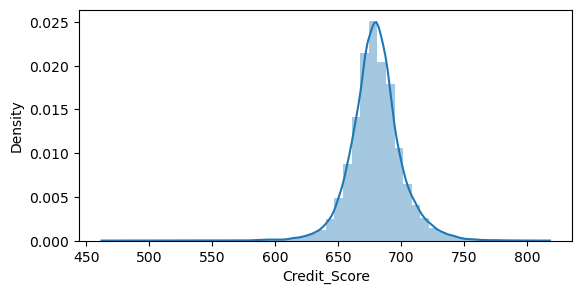

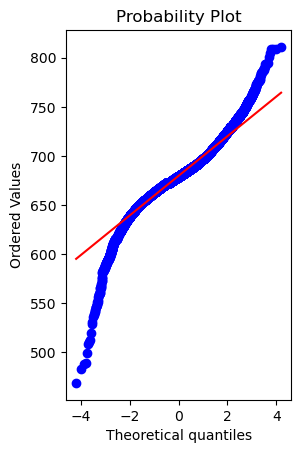

In [24]:
# Age distplot
plt.figure(figsize=(14,3))
plt.subplot(121)
sns.distplot(df["Credit_Score"])
plt.show()
plt.subplot(121)
stats.probplot(df["Credit_Score"], dist="norm", plot=plt)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51296 entries, 0 to 51295
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  51296 non-null  int64  
 1   Total_TL                    51296 non-null  int64  
 2   Tot_Closed_TL               51296 non-null  int64  
 3   Tot_Active_TL               51296 non-null  int64  
 4   Total_TL_opened_L6M         51296 non-null  int64  
 5   Tot_TL_closed_L6M           51296 non-null  int64  
 6   pct_tl_open_L6M             51296 non-null  float64
 7   pct_tl_closed_L6M           51296 non-null  float64
 8   pct_active_tl               51296 non-null  float64
 9   pct_closed_tl               51296 non-null  float64
 10  Total_TL_opened_L12M        51296 non-null  int64  
 11  Tot_TL_closed_L12M          51296 non-null  int64  
 12  pct_tl_open_L12M            51296 non-null  float64
 13  pct_tl_closed_L12M          512

In [26]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,others,693,P2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,others,others,673,P2
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.0,0.0,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
51292,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.0,0.0,0,0,others,others,702,P1
51293,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.0,0.0,0,0,ConsumerLoan,others,661,P3
51294,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,others,686,P2


In [ ]:
df['Credit_Score'].plot(kind='hist',bins=50)